In [4]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns
from pathlib import Path



Date Calculation 

In [5]:
end_date = datetime.today().strftime('%Y-%m-%d')
end_date_split = end_date.split("-")
end_date_year = end_date_split[0]
end_date_month = end_date_split[1]
end_date_day = end_date_split[2]
beg_date_year = int(end_date_year) -5 
beg_date = str(beg_date_year) + "-" + end_date_month + "-" + end_date_day



Telecom Data Analysis for outside US Telecom provider

In [6]:
# get the data
telecom_outsideus_stock_df = pd.DataFrame()
telecom_outsideus_stock_df["stock_name"] = ''
telecom_outsideus_stock_df["sector"] = ''
telecom_outsideus_stock_df["Date"] = ''
telecom_outsideus_stock_df["Open"] = ''
telecom_outsideus_stock_df["High"] = ''
telecom_outsideus_stock_df["Low"] = ''
telecom_outsideus_stock_df["Close"] = ''
telecom_outsideus_stock_df["Adj Close"] = ''
telecom_outsideus_stock_df["Volume"] = ''


stocks = ["DTEGY", "VOD", "GTMEF","AAFRF"]
for stock in stocks : 
    data = yf.download(stock, start = beg_date,
                   end = end_date)
    data["stock_name"] = stock
    data["sector"] = "Telecom"
    data = data.reset_index()
    #stock_df = pd.merge(pd.merge(stock_df,data,on='Date'))
    #stock_df = stock_df.merge(data, how='right')
    telecom_outsideus_stock_df = telecom_outsideus_stock_df.append(data, ignore_index = True)

telecom_outsideus_stock_df.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_26960\1685925665.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_outsideus_stock_df = telecom_outsideus_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_26960\1685925665.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_outsideus_stock_df = telecom_outsideus_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_26960\1685925665.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_outsideus_stock_df = telecom_outsideus_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_26960\1685925665.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_outsideus_stock_df = telecom_outsideus_stock_df.append(data, ignore_index = True)


,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume
0,DTEGY,Telecom,2018-08-08,16.490000,16.600000,16.42,16.549999,14.892191,67400
1,DTEGY,Telecom,2018-08-09,16.549999,16.570000,16.40,16.410000,14.766214,80300
2,DTEGY,Telecom,2018-08-10,15.910000,15.950000,15.82,15.880000,14.289305,105800
3,DTEGY,Telecom,2018-08-13,16.030001,16.070000,15.91,15.960000,14.361291,78800
4,DTEGY,Telecom,2018-08-14,16.040001,16.049999,15.92,15.980000,14.379288,103800


Telecom Data Analysis for US Telecom provider

In [7]:
 
# get the data
telecom_us_stock_df = pd.DataFrame()
telecom_us_stock_df["stock_name"] = ''
telecom_us_stock_df["sector"] = ''
telecom_us_stock_df["Date"] = ''
telecom_us_stock_df["Open"] = ''
telecom_us_stock_df["High"] = ''
telecom_us_stock_df["Low"] = ''
telecom_us_stock_df["Close"] = ''
telecom_us_stock_df["Adj Close"] = ''
telecom_us_stock_df["Volume"] = ''


stocks = ["TMUS", "T", "VZ"]
for stock in stocks : 
    data = yf.download(stock, start = beg_date,
                   end = end_date)
    data["stock_name"] = stock
    data["sector"] = "Telecom"
    data = data.reset_index()
    #stock_df = pd.merge(pd.merge(stock_df,data,on='Date'))
    #stock_df = stock_df.merge(data, how='right')
    telecom_us_stock_df = telecom_us_stock_df.append(data, ignore_index = True)

telecom_us_stock_df.head()


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_26960\506198736.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_us_stock_df = telecom_us_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_26960\506198736.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_us_stock_df = telecom_us_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_26960\506198736.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_us_stock_df = telecom_us_stock_df.append(data, ignore_index = True)


,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume
0,TMUS,Telecom,2018-08-08,65.309998,65.650002,64.459999,65.500000,65.500000,3106500
1,TMUS,Telecom,2018-08-09,65.519997,65.739998,64.839996,64.970001,64.970001,2317500
2,TMUS,Telecom,2018-08-10,64.639999,65.199997,64.059998,64.980003,64.980003,2241600
3,TMUS,Telecom,2018-08-13,64.940002,65.800003,64.529999,65.699997,65.699997,3222200
4,TMUS,Telecom,2018-08-14,65.779999,66.440002,65.660004,65.959999,65.959999,3311900


Merge US and Non US Telecom Dataframes

In [8]:
telecom_stock_df = telecom_us_stock_df.append(telecom_outsideus_stock_df, ignore_index = True)

C:\Users\RMaji\AppData\Local\Temp\ipykernel_26960\4266246263.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_stock_df = telecom_us_stock_df.append(telecom_outsideus_stock_df, ignore_index = True)


Line Graph for Stock Price over time

<IPython.core.display.Javascript object>


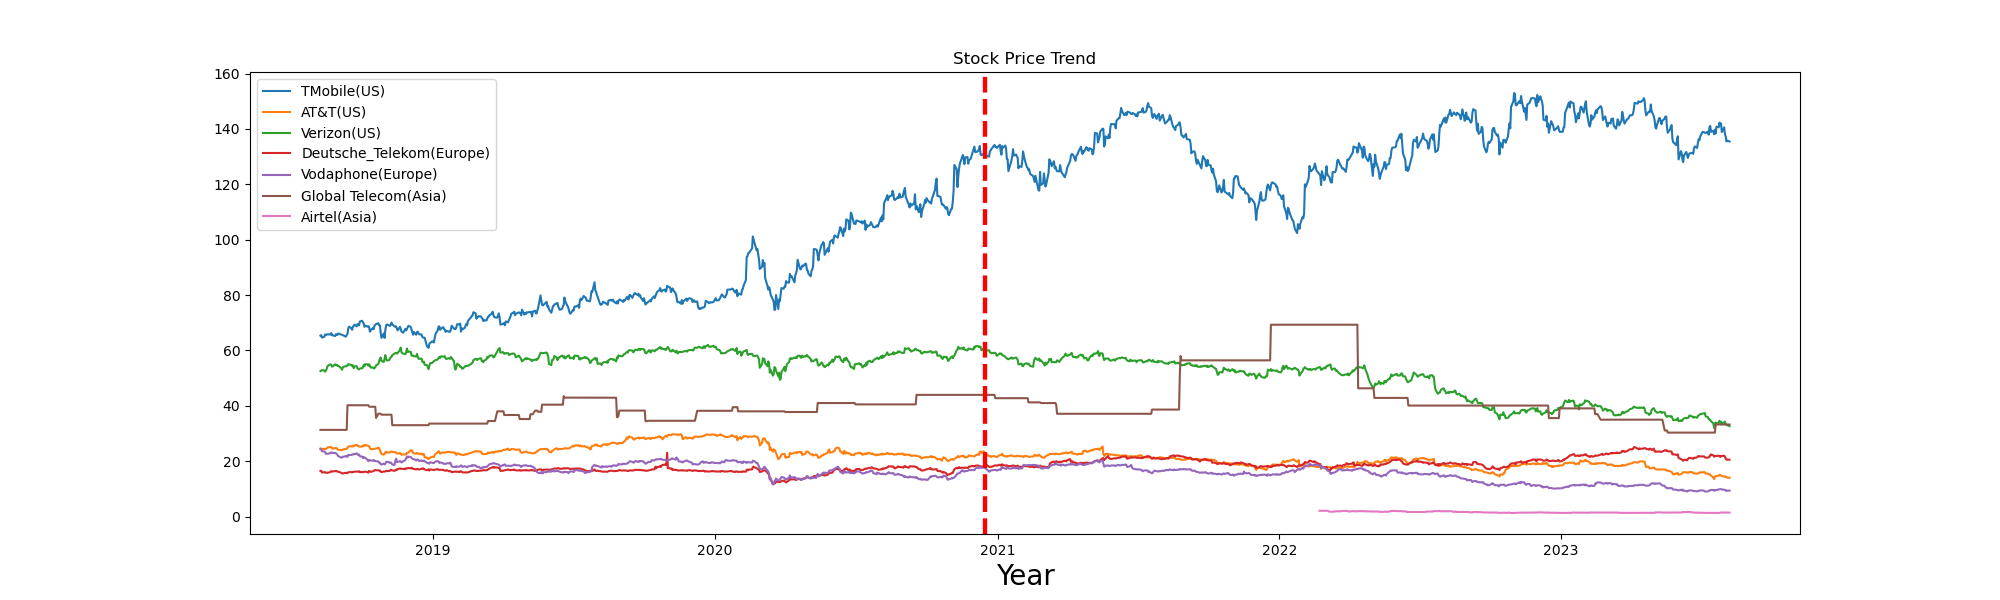

In [10]:
%matplotlib notebook
import datetime

TMobile_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "TMUS"]
ATT_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "T"]
Verizon_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "VZ"]
Deutsche_Telekom_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "DTEGY"]
Vodaphone_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "VOD"]
Global_Telecom_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "GTMEF"]
Airtel_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "AAFRF"]

plt_1 = plt.figure(figsize=(20, 6))
plt.plot(TMobile_Stock["Date"], TMobile_Stock["Open"], label = "TMobile(US)")
plt.plot(ATT_Stock["Date"], ATT_Stock["Open"], label = "AT&T(US)")
plt.plot(Verizon_Stock["Date"], Verizon_Stock["Open"], label = "Verizon(US)")
plt.plot(Deutsche_Telekom_Stock["Date"], Deutsche_Telekom_Stock["Open"], label = "Deutsche_Telekom(Europe)")
plt.plot(Vodaphone_Stock["Date"], Vodaphone_Stock["Open"], label = "Vodaphone(Europe)")
plt.plot(Global_Telecom_Stock["Date"], Global_Telecom_Stock["Open"], label = "Global Telecom(Asia)")
plt.plot(Airtel_Stock["Date"], Airtel_Stock["Open"], label = "Airtel(Asia)")
plt.axvline(datetime.datetime(2020, 12, 16), color='red', linewidth=3, linestyle='--')
plt.xlabel("Year",fontsize=20)
plt.axvline(datetime.datetime(2020, 12, 16), color='red', linewidth=3, linestyle='--')
plt.legend()
plt.title("Stock Price Trend")
plt.show()

As per the above line graph to show Tock Price change for different major Telecom Stocks across world. As per the line graph there is no major Stock price chnage for Covid in Telecom Industry. Only we saw pretty steep curve for TMobile Stock Price , but after further research on that , it is for TMobile and Sprint Merger which appened on Feb,2020.